In [1]:
import json
import os
import sys

from sentence_transformers import SentenceTransformer
import torch

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data import *
from testing import *

/home/xbuban1/llama_games_venv/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
device = torch.device("cuda:2")

model_name = "paraphrase-multilingual-MiniLM-L12-v2"

data_config = dict(
    root="/home/xbuban1/Games",
    data_name="apps_filtered_en.json",
    image_size=224,
    max_image_stack_size=10,
    max_label_length=1024,
    minibatch_size=1,
    data_split=0.8,
    include_hints=False,
    seed=42
)

train_loader, val_loader = load_app_data(
    **data_config,
    tokenizer=None,
    processor=None,
    device=None
)

target_descriptions = []
for data in val_loader:
    image_batches, [hints, descriptions] = data
    target_descriptions.append(descriptions[0])

with open('captions/games/quant_no_hint.json') as f:
    quant_no_hint_captions = json.load(f)

with open('captions/games/quant_hint.json') as f:
    quant_hint_captions = json.load(f)

with open('captions/games/full_no_hint.json') as f:
    full_no_hint_captions = json.load(f)

with open('captions/games/full_hint.json') as f:
    full_hint_captions = json.load(f)

model = SentenceTransformer(model_name, device=device)

quant_no_hint_similarities = get_app_similarities(model, target_descriptions, quant_no_hint_captions)
quant_no_hint_avg_sim = torch.stack(quant_no_hint_similarities).mean(dim=0)

quant_hint_similarities = get_app_similarities(model, target_descriptions, quant_hint_captions)
quant_hint_avg_sim = torch.stack(quant_hint_similarities).mean(dim=0)

full_no_hint_similarities = get_app_similarities(model, target_descriptions, full_no_hint_captions)
full_no_hint_avg_sim = torch.stack(full_no_hint_similarities).mean(dim=0)

full_hint_similarities = get_app_similarities(model, target_descriptions, full_hint_captions)
full_hint_avg_sim = torch.stack(full_hint_similarities).mean(dim=0)

empty_similarities = get_empty_similarities(model, target_descriptions)
empty_avg_sim = torch.stack(empty_similarities).mean(dim=0)

print(f"Model: {model_name}")
print(f"Quant No Hint Captions similarity score: {quant_no_hint_avg_sim:0.4f}")
print(f"Quant Hint Captions similarity score: {quant_hint_avg_sim:0.4f}")
print(f"Full No Hint Captions similarity score: {full_no_hint_avg_sim:0.4f}")
print(f"Full Hint Captions similarity score: {full_hint_avg_sim:0.4f}")

/home/xbuban1/llama_games_venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Calculating similarities: 100%|██████████| 4043/4043 [01:05<00:00, 61.28it/s]

Model: paraphrase-multilingual-MiniLM-L12-v2
Quant No Hint Captions similarity score: 0.3226
Quant Hint Captions similarity score: 0.6613
Full No Hint Captions similarity score: 0.4034
Full Hint Captions similarity score: 0.6812


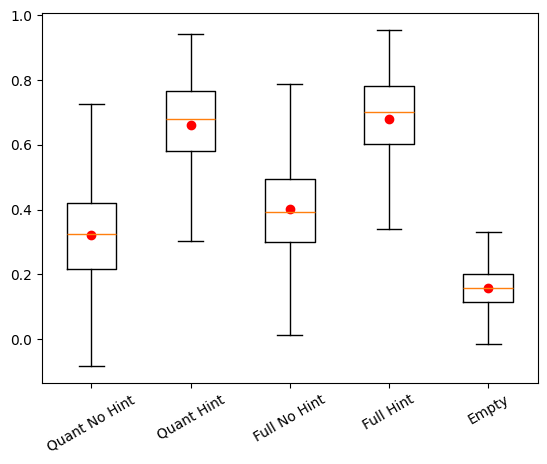

In [3]:
boxplot_similarities(
    [quant_no_hint_similarities, quant_hint_similarities, full_no_hint_similarities, full_hint_similarities, empty_similarities],
    [quant_no_hint_avg_sim, quant_hint_avg_sim, full_no_hint_avg_sim, full_hint_avg_sim, empty_avg_sim],
    ["Quant No Hint", "Quant Hint", "Full No Hint", "Full Hint", "Empty"],
)

In [4]:
model_name = "paraphrase-multilingual-mpnet-base-v2"

model = SentenceTransformer(model_name, device=device)

quant_no_hint_similarities = get_app_similarities(model, target_descriptions, quant_no_hint_captions)
quant_no_hint_avg_sim = torch.stack(quant_no_hint_similarities).mean(dim=0)

quant_hint_similarities = get_app_similarities(model, target_descriptions, quant_hint_captions)
quant_hint_avg_sim = torch.stack(quant_hint_similarities).mean(dim=0)

full_no_hint_similarities = get_app_similarities(model, target_descriptions, full_no_hint_captions)
full_no_hint_avg_sim = torch.stack(full_no_hint_similarities).mean(dim=0)

full_hint_similarities = get_app_similarities(model, target_descriptions, full_hint_captions)
full_hint_avg_sim = torch.stack(full_hint_similarities).mean(dim=0)

empty_similarities = get_empty_similarities(model, target_descriptions)
empty_avg_sim = torch.stack(empty_similarities).mean(dim=0)

print(f"Model: {model_name}")
print(f"Quant No Hint Captions similarity score: {quant_no_hint_avg_sim:0.4f}")
print(f"Quant Hint Captions similarity score: {quant_hint_avg_sim:0.4f}")
print(f"Full No Hint Captions similarity score: {full_no_hint_avg_sim:0.4f}")
print(f"Full Hint Captions similarity score: {full_hint_avg_sim:0.4f}")

/home/xbuban1/llama_games_venv/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Calculating similarities: 100%|██████████| 4043/4043 [01:19<00:00, 51.05it/s]

Model: paraphrase-multilingual-mpnet-base-v2
Quant No Hint Captions similarity score: 0.3316
Quant Hint Captions similarity score: 0.6641
Full No Hint Captions similarity score: 0.4051
Full Hint Captions similarity score: 0.6867


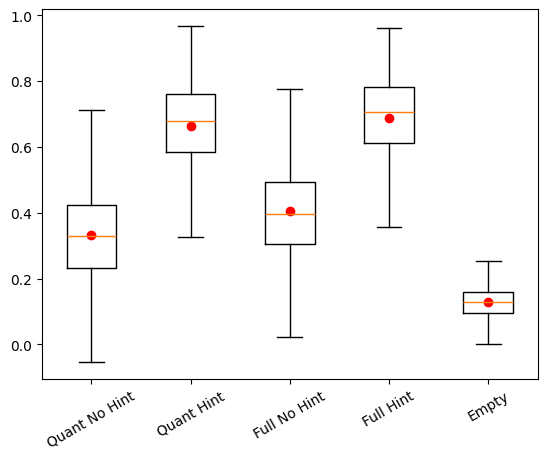

In [5]:
boxplot_similarities(
    [quant_no_hint_similarities, quant_hint_similarities, full_no_hint_similarities, full_hint_similarities, empty_similarities],
    [quant_no_hint_avg_sim, quant_hint_avg_sim, full_no_hint_avg_sim, full_hint_avg_sim, empty_avg_sim],
    ["Quant No Hint", "Quant Hint", "Full No Hint", "Full Hint", "Empty"],
)